In [6]:
import random
import os
import datetime
import pickle

import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from ELSTM import ELSTM_Dynamic as ELSTM

import ipywidgets as widgets
# from IPython.display import display



In [7]:
# get list of all exp folders
exp_folders = [f for f in os.listdir('output') if os.path.isdir(os.path.join('output', f))]

# # Create the Dropdown widget
# dropdown = widgets.Dropdown(
#     options=exp_folders,
#     description='Select experiment:'
# )

# # Display the Dropdown widget
# display(dropdown)
# print("Selected experiment:", dropdown.value)

# print table of all experiments with idnex
for i, exp in enumerate(exp_folders):
    print(i, exp)
    

0 2023-08-01_13-13-56
1 2023-08-01_13-16-25
2 2023-08-01_13-18-08
3 2023-08-01_13-19-46
4 2023-08-01_13-21-48
5 2023-08-01_13-28-23
6 2023-08-01_15-28-33
7 2023-08-01_15-37-51
8 2023-08-02_11-31-15
9 2023-08-02_13-04-45
10 2023-08-02_13-14-44
11 2023-08-02_13-15-30
12 2023-08-02_13-20-30
13 2023-08-02_13-29-50
14 2023-08-02_13-32-06
15 2023-08-02_14-15-52
16 2023-08-02_14-16-55
17 2023-08-08_13-17-35
18 2023-08-08_14-13-12
19 2023-08-08_14-43-55
20 2023-08-08_16-27-37
21 2023-08-09_10-55-37
22 2023-08-09_12-03-09
23 2023-08-15_12-27-08
24 2023-08-15_12-36-35
25 2023-08-15_12-38-32
26 2023-08-15_12-40-18
27 2023-08-15_12-41-40
28 2023-08-15_12-42-27
29 2023-08-15_12-45-41
30 2023-08-15_12-48-05
31 2023-08-15_13-30-51
32 2023-08-15_16-18-16
33 2023-08-15_16-19-59
34 2023-08-15_16-21-44
35 2023-08-16_13-47-49
36 2023-08-16_13-48-35
37 2023-08-16_13-49-30
38 2023-08-16_13-50-37
39 2023-09-01_14-09-44
40 2023-09-01_14-10-20
41 2023-09-01_14-11-44
42 2023-09-01_14-11-56
43 2023-09-01_14-12-0

In [11]:
experiment_to_load = '2023-08-15_13-30-51' #2023-08-02_13-04-45 AND 2023-08-02_13-14-44 AND 2023-08-02_13-15-30
# experiment_to_load = exp_folders[-1]
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti, moves=list)
pop = pickle.load(open('output/' + experiment_to_load + '/population.pkl', 'rb'))
log = pickle.load(open("output/" + experiment_to_load + "/logbook.pkl", "rb"))

params = open('output/' + experiment_to_load + '/params.txt', 'rb').read().decode('utf-8')
params = params.split('\n')
params = [p.split(': ')[1] for p in params]
units, pop_size, gens, cxpb, mutpb, indpb, mu, sigma, eta, TARGET = params
target = [int(t) for t in TARGET[1:-1].split(' ')]
print(target)

[30, 50]


2023-08-15_13-30-51


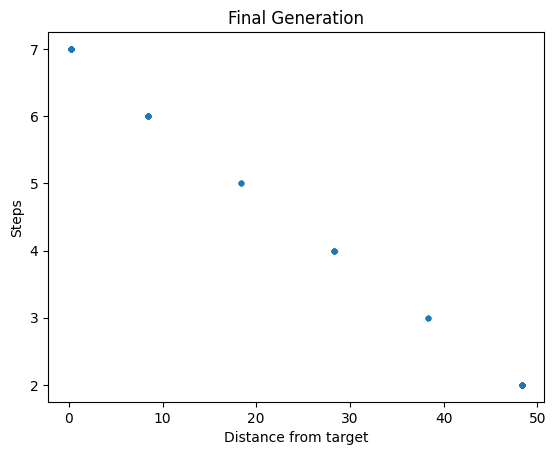

In [12]:
print(experiment_to_load)
fitnesses = [ind.fitness.values for ind in pop]
fitnesses = np.array(fitnesses)
x, y = fitnesses[:, 0], fitnesses[:, 1]
# Scatter plot with jitter
plt.scatter(x, y, alpha=0.5, s=10)
plt.xlabel('Distance from target')
plt.ylabel('Steps')
plt.title('Final Generation')
plt.show()


C:\Users\cr1240\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\tools\_hypervolume\pyhv.py:35: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "


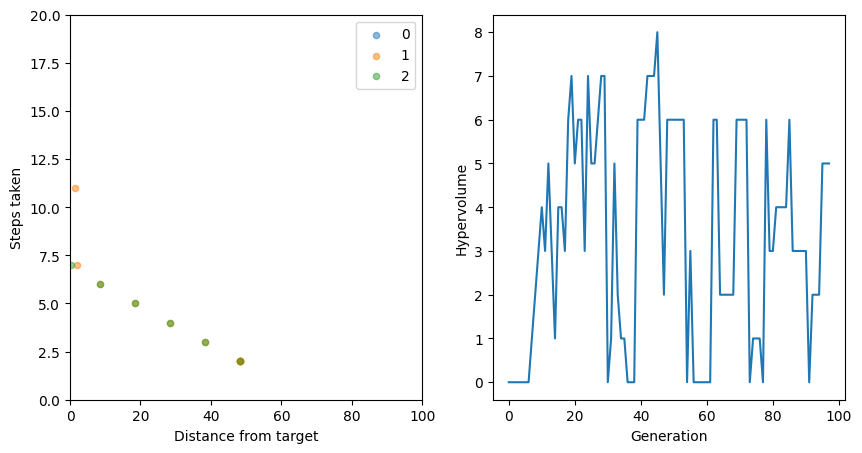

In [13]:


# get max gens from log
max_gens = log.select("gen")[-1] - 1

# # select 5 generations farom 0 to max_gens
# gens = np.linspace(0, max_gens, 5).astype(int)

# # load pop from each of these gens
# pops = [pickle.load(open('output/' + experiment_to_load + '/populations/gen_' + str(g) + '.pkl', 'rb')) for g in gens]

# # plot fitnesses from each gen
# for i, pop in enumerate(pops):
#     fitnesses = [ind.fitness.values for ind in pop]
#     fitnesses = np.array(fitnesses)
#     x, y = fitnesses[:, 0], fitnesses[:, 1]
#     plt.scatter(x, y, alpha=0.5, s=20, label=gens[i])
    
# plt.legend()
# plt.title("Fitnesses of individuals in each generation (truncated)")

# plt.xlim(0, 75)
# plt.ylim(0, 25)

# plt.xlabel("Distance from target")
# plt.ylabel("Steps taken")
# plt.show()

pops = [pickle.load(open('output/' + experiment_to_load + '/populations/gen_' + str(g) + '.pkl', 'rb')) for g in range(max_gens)]

# get pareto front from each gen
pareto_fronts = [tools.ParetoFront() for _ in range(len(pops))]
for i, pop in enumerate(pops):
    pareto_fronts[i].update(pop)

# get hypervolume of each pareto front
hv = [tools.hypervolume(front) for front in pareto_fronts]

# plot hypervoluems and pareto fronts in subgraphs
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# plot pareto fronts
for i, front in enumerate([pareto_fronts[0], pareto_fronts[len(pareto_fronts)//2], pareto_fronts[-1]]):
    fitnesses = [ind.fitness.values for ind in front]
    fitnesses = np.array(fitnesses)
    x, y = fitnesses[:, 0], fitnesses[:, 1]
    axs[0].scatter(x, y, alpha=0.5, s=20, label=i)
axs[0].legend()
axs[0].set_xlabel("Distance from target")
axs[0].set_ylabel("Steps taken")
axs[0].set_xlim(0, 100)
axs[0].set_ylim(0, 20)

# plot
axs[1].plot(range(max_gens), hv)
axs[1].set_xlabel("Generation")
axs[1].set_ylabel("Hypervolume")
plt.show()



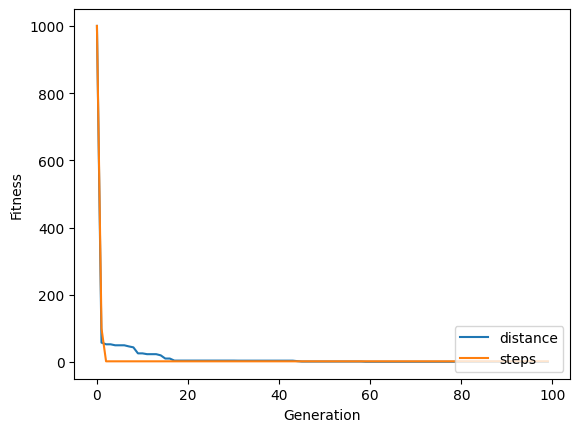

In [14]:
# plot fitness of each objective over generations

# load logbook.pkl
gen, avg, min, max_ = log.select("gen", "avg", "min", "max")
dist, steps = zip(*log.select("min"))
plt.plot(gen, dist, label="distance")
plt.plot(gen, steps, label="steps")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")
plt.show()


In [15]:
moving_ids = []

for i, ind in enumerate(pop):
    if len(ind.moves) > 1:
        moving_ids.append(i)

print(f'{len(moving_ids)} out of {len(pop)} are moving')

100 out of 100 are moving


98
saving to output/2023-08-15_13-30-51/plots/individual_18.svg


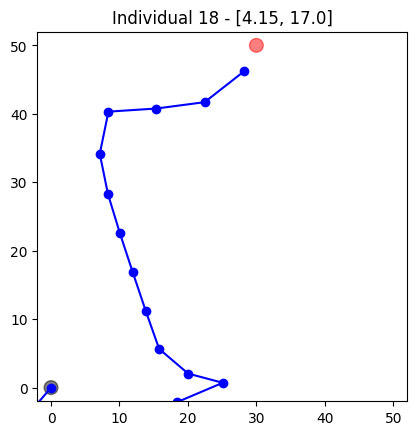

In [127]:
print(len(pops))
ind_to_show = 18
gen_to_show = 30
ind = pops[gen_to_show][ind_to_show]

x, y = zip(*ind.moves)

plt.plot(x, y, 'bo-')

# Add a circle as the origin
origin_x, origin_y = x[0], y[0]
circle = Circle((origin_x, origin_y), radius=1, edgecolor='k', facecolor='k', alpha=0.5)
plt.gca().add_patch(circle)

# Add a circle as the target
target_x, target_y = target
circle = Circle((target_x, target_y), radius=1, edgecolor='r', facecolor='r', alpha=0.5)
plt.gca().add_patch(circle)

# ax.set_xlim(-2, 32)  # Set appropriate x-axis limits
# ax.set_ylim(-2, 50)  # Set appropriate y-axis limits

# limit to -2 to 50
plt.xlim(-2, 52)
plt.ylim(-2, 52)

rounded_fitnesses = [round(f, 2) for f in ind.fitness.values]

plt.title(f"Individual {ind_to_show} - {rounded_fitnesses}")  # Set a title for each subplot
# plt.set(aspect='equal')
# set aspect ratio to 1
plt.gca().set_aspect('equal', adjustable='box')

# Adjust layout and spacing
# plt.tight_layout()

# save as svg
print("saving to", 'output/' + experiment_to_load + '/plots/individual_' + str(ind_to_show) + '.svg')
# make plots folder
if not os.path.exists('output/' + experiment_to_load + '/plots'):
    os.makedirs('output/' + experiment_to_load + '/plots')
plt.savefig('output/' + experiment_to_load + '/plots/individual_' + str(gen_to_show) + '_' + str(ind_to_show) + '.svg', format='svg')


plt.show()

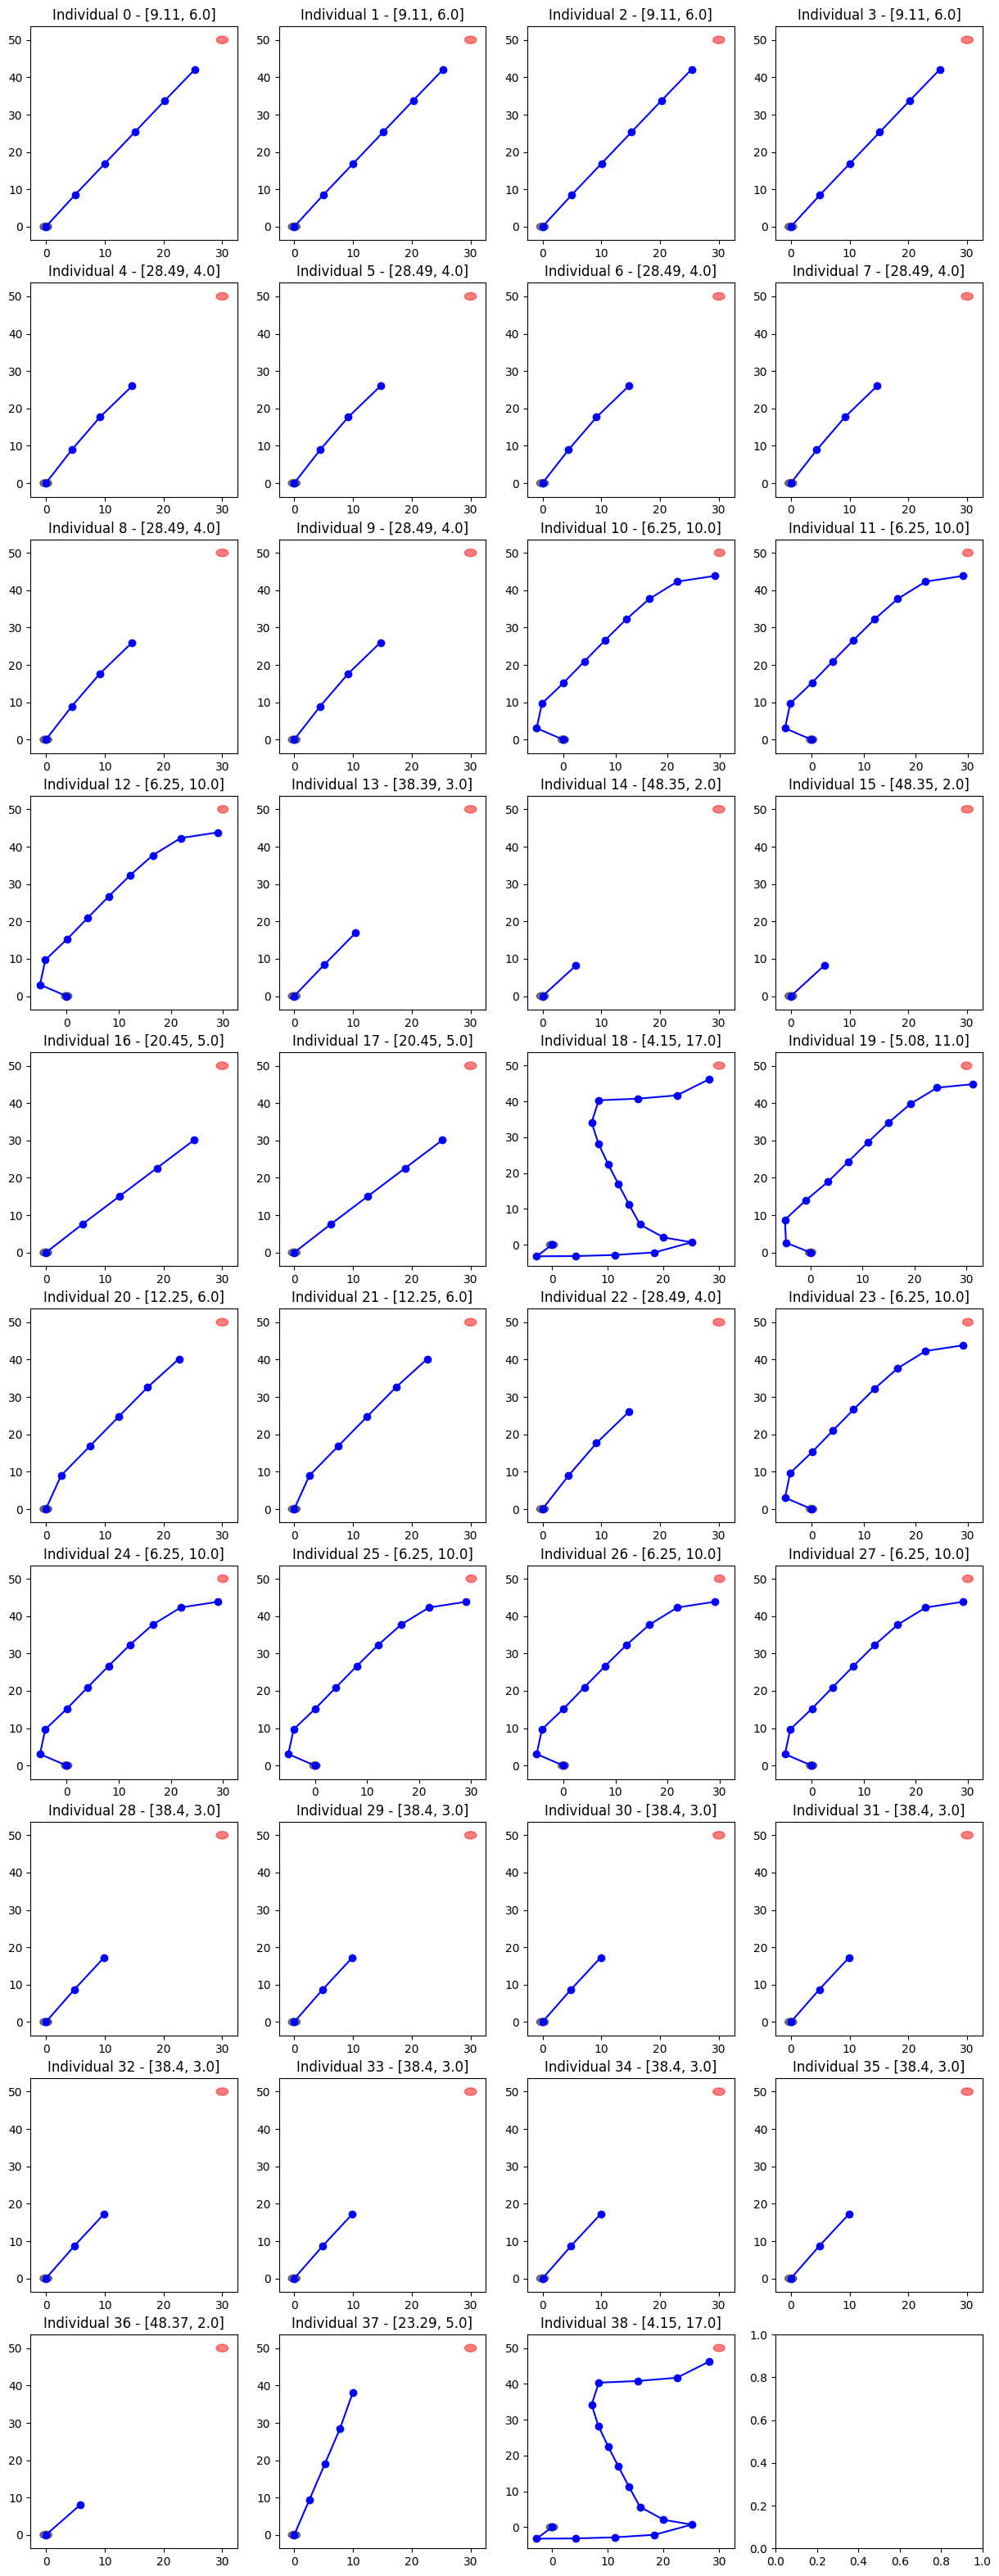

In [126]:
gen_to_show = 30


cols = 4  # Number of rows and columns in the subplot grid
inds_to_show = range(0, 39)  # List of individuals you want to show (n x n = 3 x 3 = 9 individuals in this example)
pop = pops[gen_to_show]

# Calculate the number of rows needed based on the total number of individuals
rows = (len(inds_to_show) + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, ind_to_show in enumerate(inds_to_show):
    x, y = zip(*pop[ind_to_show].moves)  

    ax = axs[i // cols, i % cols]
    ax.plot(x, y, 'bo-')       # Customize the plot as needed

    # Add a circle as the origin
    origin_x, origin_y = x[0], y[0]
    circle = Circle((origin_x, origin_y), radius=1, edgecolor='k', facecolor='k', alpha=0.5)
    ax.add_patch(circle)

    # Add a circle as the target
    target_x, target_y = target
    circle = Circle((target_x, target_y), radius=1, edgecolor='r', facecolor='r', alpha=0.5)
    ax.add_patch(circle)

    # ax.set_xlim(-2, 42)  # Set appropriate x-axis limits
    # ax.set_ylim(-2, 42)  # Set appropriate y-axis limits

    rounded_fitnesses = [round(f, 2) for f in pop[ind_to_show].fitness.values]

    ax.set_title(f"Individual {ind_to_show} - {rounded_fitnesses}")  # Set a title for each subplot

# Adjust layout and spacing
# plt.tight_layout()
plt.show()


In [ ]:
# pop = pickle.load(open('output/' + experiment_to_load + '/population.pkl', 'rb'))
gens_to_get = [0, 25, 50, 75, 98]
gens = [pickle.load(open('output/' + experiment_to_load + '/populations/gen_' + str(gen) + '.pkl', 'rb')) for gen in gens_to_get]

# get first 7 individuals from each generation
individuals_to_plot = []
for i in range(7):
    for gen in gens:
        individuals_to_plot.append(gen[i])

# generate labels
labels = []
for i in range(7):
    for gen in gens_to_get:
        labels.append(f'gen: {gen} ind: {i}')

cols = 5  # Number of rows and columns in the subplot grid
# inds_to_show = moving_ids[:40]  # List of individuals you want to show (n x n = 3 x 3 = 9 individuals in this example)
inds_to_show = individuals_to_plot

# Calculate the number of rows needed based on the total number of individuals
rows = (len(inds_to_show) + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, ind_to_show in enumerate(inds_to_show):
    x, y = zip(*ind_to_show.moves)

    ax = axs[i // cols, i % cols]
    ax.plot(x, y, 'bo-')       # Customize the plot as needed

    # Add a circle as the origin
    origin_x, origin_y = x[0], y[0]
    circle = Circle((origin_x, origin_y), radius=1, edgecolor='k', facecolor='k', alpha=0.5)
    ax.add_patch(circle)

    # Add a circle as the target
    target_x, target_y = target
    circle = Circle((target_x, target_y), radius=1, edgecolor='r', facecolor='r', alpha=0.5)
    ax.add_patch(circle)

    # ax.set_xlim(-2, 42)  # Set appropriate x-axis limits
    # ax.set_ylim(-2, 42)  # Set appropriate y-axis limits
    
    ax.set_title(f"Individual {labels[i]}")  # Set a title for each subplot

# Adjust layout and spacing
plt.tight_layout()
plt.show()
